In [1]:
%matplotlib inline
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
from model import StyleTransferModel

In [3]:
m = StyleTransferModel()

cpu


/home/mikhail/study/DLS_project/telegram_bot/model.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/home/mikhail/study/DLS_project/telegram_bot/model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


In [4]:
path = '/home/mikhail/study/deep_learning_2018-19/14. GAN and Style transfer/'

In [5]:
style_img = m.image_loader(path+"images/picasso.jpg")# as well as here
content_img = m.image_loader(path+"images/lisa.jpg")#измените путь на тот который у вас.

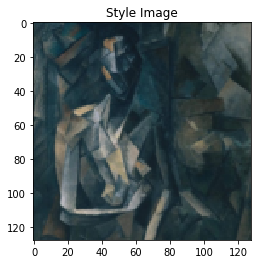

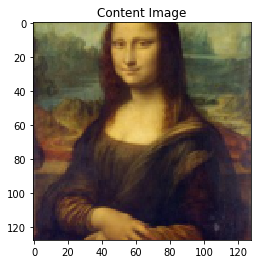

In [6]:
unloader = transforms.ToPILImage() # тензор в кратинку  

plt.ion() 

def imshow(tensor, title=None):
    image = tensor.cpu().clone()   
    image = image.squeeze(0)      # функция для отрисовки изображения
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

# отрисовка

plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

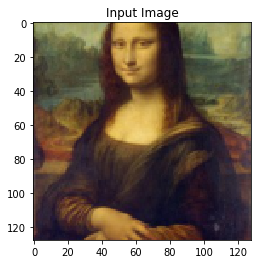

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 6.314861 Content Loss: 7.615603

run [100]:
Style Loss : 2.189117 Content Loss: 5.140359

run [150]:
Style Loss : 1.588092 Content Loss: 4.494255

run [200]:
Style Loss : 1.363475 Content Loss: 4.235690

run [250]:
Style Loss : 1.228767 Content Loss: 4.140444

run [300]:
Style Loss : 1.163988 Content Loss: 4.094125

run [350]:
Style Loss : 1.127571 Content Loss: 4.065538

run [400]:
Style Loss : 1.107428 Content Loss: 4.043873

run [450]:
Style Loss : 1.089839 Content Loss: 4.031238

run [500]:
Style Loss : 1.078343 Content Loss: 4.020939



In [7]:
input_img = content_img.clone()
# if you want to use white noise instead uncomment the below line:
# input_img = torch.randn(content_img.data.size(), device=device)

# add the original input image to the figure:
plt.figure()
imshow(input_img, title='Input Image')
output = m.run_style_transfer(content_img, style_img, input_img)

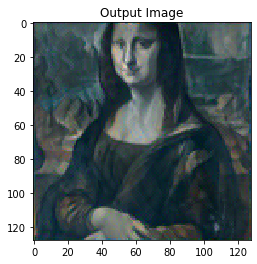

In [8]:
plt.figure()
imshow(output, title='Output Image')
#plt.imsave(output, 'output.png')
# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()